In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import math 
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, ClusterCentroids, AllKNN
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score, confusion_matrix
from imblearn.metrics import specificity_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


Dane z https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome/data

In [2]:
df = pd.read_csv("./income.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [5]:
df.shape

(25000, 15)

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.60916,1.896611e+05,10.076320,1083.144040,87.489800,40.442800
std,13.68660,1.054713e+05,2.576967,7321.971568,402.830246,12.309706
min,17.00000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.00000,1.179830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.782110e+05,10.000000,0.000000,0.000000,40.000000
75%,48.00000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,90.00000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df[(df['occupation'] == '?') & (df['income'] != '<=50K')]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
185,53,?,158352,Masters,14,Never-married,?,Not-in-family,White,Female,8614,0,35,United-States,>50K
583,27,?,174163,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,40,United-States,>50K
619,48,?,193047,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,>50K
1189,67,?,157403,Prof-school,15,Married-civ-spouse,?,Husband,White,Male,6418,0,10,United-States,>50K
1543,65,?,191380,10th,6,Married-civ-spouse,?,Husband,White,Male,9386,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24507,68,?,108683,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,0,12,United-States,>50K
24605,48,?,184513,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,80,United-States,>50K
24741,49,?,228372,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,20,United-States,>50K
24864,76,?,28221,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,Canada,>50K


In [8]:
df.replace("?", np.nan, inplace=True)
df.isna().sum()

age                  0
workclass         1429
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1434
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     437
income               0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,<=50K


- **age**: Wiek osoby.
- **workclass**: Ogólny termin wskazujący status zatrudnienia osoby.
- **fnlwgt**: Waga końcowa, reprezentująca liczbę osób, którą ta dana reprezentuje (próbka reprezentatywna).
- **education**: Najwyższy poziom wykształcenia osiągnięty przez osobę.
- **education.num**: Najwyższy poziom wykształcenia osiągnięty przez osobę w formie numerycznej.
- **marital.status**: Status cywilny osoby. Zwróć uwagę, że "Married-civ-spouse" oznacza cywilnego małżonka, a "Married-AF-spouse" odnosi się do małżonka w Siłach Zbrojnych.
- **occupation**: Ogólny typ zawodu osoby.
- **relationship**: Relacja tej osoby z innymi, na przykład małżonek (mąż). Każdy punkt danych ma tylko jedną relację.
- **race**: Rasa.
- **sex**: Płeć biologiczna osoby.
- **capital.gain**: Zyski kapitałowe osoby.
- **capital.loss**: Straty kapitałowe osoby.
- **hours.per.week**: Liczba godzin, które osoba zadeklarowała jako przepracowane w tygodniu.
- **native.country**: Kraj pochodzenia.
- **income**: Dochód, mniejszy lub równy $50,000 (`<=50K`) lub większy (`>50K`).


In [12]:
def categorical_value_counts(data):
    categorical_cols = data.select_dtypes(include=['object']).columns 
    value_counts = {col: data[col].value_counts() for col in categorical_cols}
    return value_counts 

In [13]:
df[df["workclass"] == "Without-pay"]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1071,46,Without-pay,142210,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,25,United-States,<=50K
1674,22,Without-pay,302347,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,4416,0,40,United-States,<=50K
2333,72,Without-pay,121004,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,55,United-States,<=50K
2632,19,Without-pay,344858,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
8033,62,Without-pay,159908,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,16,United-States,<=50K
9404,68,Without-pay,174695,Some-college,10,Married-spouse-absent,Farming-fishing,Unmarried,White,Female,0,0,25,United-States,<=50K
11464,67,Without-pay,137192,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,12,Philippines,<=50K
14631,21,Without-pay,232719,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K
18429,19,Without-pay,43887,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
21111,52,Without-pay,198262,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K


In [14]:
value_counts = categorical_value_counts(df)

for col, counts in value_counts.items():
    print(f"\nColumn: {col}")
    print(counts)



Column: workclass
workclass
Private             17157
Self-emp-not-inc     1908
Local-gov            1535
State-gov             992
Self-emp-inc          820
Federal-gov           725
Without-pay            12
Name: count, dtype: int64

Column: education
education
HS-grad         7520
Some-college    5144
Bachelors       3873
Masters         1231
Assoc-voc       1008
11th             805
Assoc-acdm       760
10th             647
Prof-school      420
7th-8th          410
9th              351
Doctorate        301
12th             298
5th-6th          228
1st-4th          121
Preschool         32
Name: count, dtype: int64

Column: marital.status
marital.status
Married-civ-spouse       10830
Never-married             7451
Divorced                  3214
Separated                  718
Widowed                    642
Married-spouse-absent      277
Married-AF-spouse           17
Name: count, dtype: int64

Column: occupation
occupation
Prof-specialty       3119
Craft-repair         3083
Exec-ma

In [15]:
# Funkcja do obliczania V-Cramera
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

def cramers_v_output(v_cramer, variable1, variable2):
    print(f"V-Cramer dla zmiennych {variable1} & {variable2}: {v_cramer}")

    # Interpretacja wyniku
    if v_cramer < 0.1:
        print("Bardzo słaba zależność")
    elif v_cramer < 0.3:
        print("Słaba zależność")
    elif v_cramer < 0.5:
        print("Umiarkowana zależność")
    else:
        print("Silna zależność")

In [16]:

contingency_table = pd.crosstab(df['relationship'], df['marital.status'])

v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'relationship', 'marital.status')

V-Cramer dla zmiennych relationship & marital.status: 0.4883047419738085
Umiarkowana zależność


In [17]:
contingency_table = pd.crosstab(df['workclass'], df['occupation'])

v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'workclass', 'occupation')


V-Cramer dla zmiennych workclass & occupation: 0.21386591543583022
Słaba zależność


In [18]:
contingency_table = pd.crosstab(df['race'], df['native.country'])


v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'race', 'native.country')


V-Cramer dla zmiennych race & native.country: 0.42552233243500237
Umiarkowana zależność


In [19]:
df = pd.get_dummies(df,columns=['income'], drop_first=True, dtype=int)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income_>50K
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,1
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,0
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,1
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,1
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,0


In [20]:
region_mapping = {
    'Cambodia': 'Asia',
    'Canada': 'North America',
    'China': 'Asia',
    'Columbia': 'South America',
    'Cuba': 'Caribbean',
    'Dominican-Republic': 'Caribbean',
    'Ecuador': 'South America',
    'El-Salvador': 'Central America',
    'England': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Guatemala': 'Central America',
    'Haiti': 'Caribbean',
    'Honduras': 'Central America',
    'Hong': 'Asia',
    'Hungary': 'Europe',
    'India': 'Asia',
    'Iran': 'Middle East',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Jamaica': 'Caribbean',
    'Japan': 'Asia',
    'Laos': 'Asia',
    'Mexico': 'North America',
    'Nicaragua': 'Central America',
    'Outlying-US(Guam-USVI-etc)': 'US Territories',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto-Rico': 'Caribbean',
    'Scotland': 'Europe',
    'South': 'Asia',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Trinadad&Tobago': 'Caribbean',
    'United-States': 'North America',
    'Vietnam': 'Asia',
    'Yugoslavia': 'Europe'
}

# Dodanie kolumny native.region na podstawie mapowania
df['native.region'] = df['native.country'].replace(region_mapping)

df = df.drop(columns=['native.country'])
# Sprawdzenie wyników
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income_>50K,native.region
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,1,North America
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,0,North America
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,1,North America
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,1,North America
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,0,North America


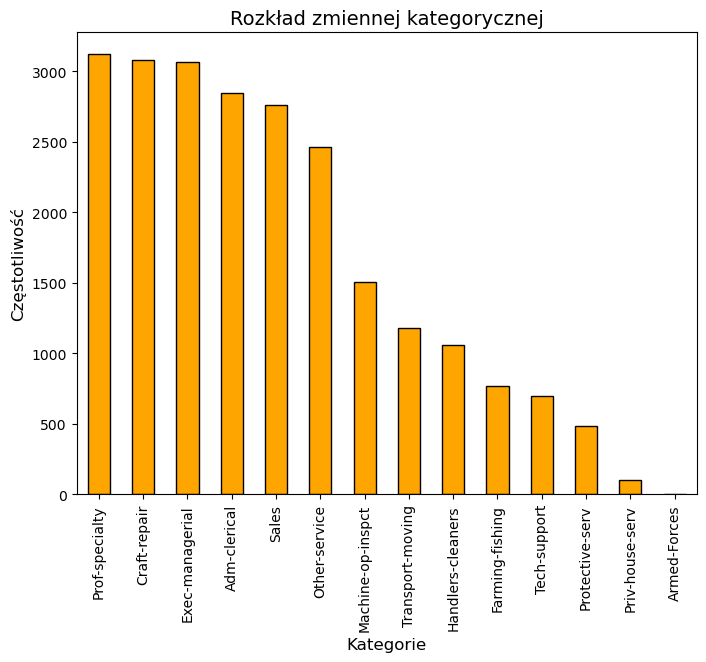

In [21]:
df['occupation'].value_counts().plot(kind='bar', color='orange', edgecolor='black', figsize=(8, 6))
plt.title('Rozkład zmiennej kategorycznej', fontsize=14)
plt.xlabel('Kategorie', fontsize=12)
plt.ylabel('Częstotliwość', fontsize=12)
plt.show()

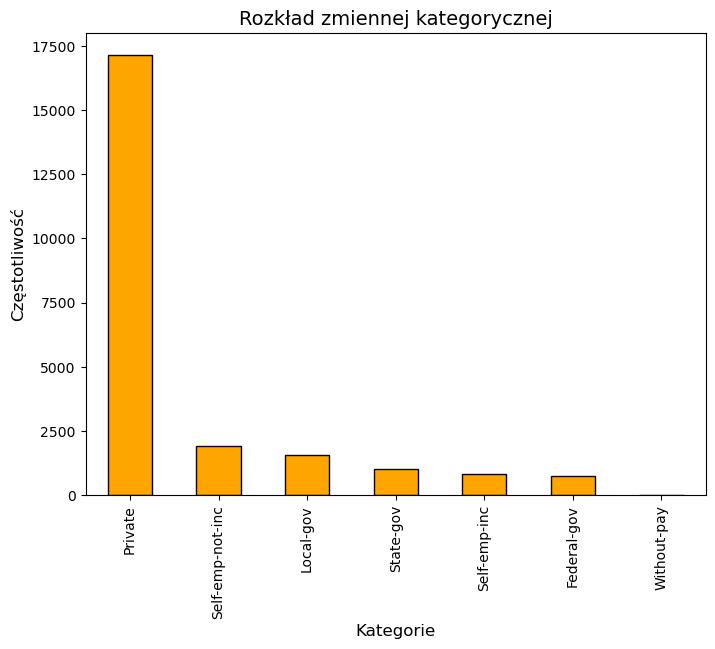

In [22]:
df['workclass'].value_counts().plot(kind='bar', color='orange', edgecolor='black', figsize=(8, 6))
plt.title('Rozkład zmiennej kategorycznej', fontsize=14)
plt.xlabel('Kategorie', fontsize=12)
plt.ylabel('Częstotliwość', fontsize=12)
plt.show()

In [23]:
# Funkcja do obliczenia WoE i IV
def calculate_woe_iv(data, feature, target):
    """
    Oblicza WoE i IV dla zmiennej kategorycznej.
    """
    df = data[[feature, target]].copy()
    total_good = df[target].sum() 
    total_bad = len(df) - total_good  
    
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped['bad'] = grouped['count'] - grouped['sum']
    grouped['good_dist'] = grouped['sum'] / total_good
    grouped['bad_dist'] = grouped['bad'] / total_bad

    grouped['woe'] = np.log((grouped['good_dist'] + 1e-6) / (grouped['bad_dist'] + 1e-6))
    grouped['iv'] = (grouped['good_dist'] - grouped['bad_dist']) * grouped['woe']

    total_iv = grouped['iv'].sum()
    grouped = grouped.reset_index()
    return grouped, total_iv


# Funkcja do wizualizacji WoE
def plot_woe(woe_iv_df, feature):
    plt.figure(figsize=(10, 6))
    plt.bar(woe_iv_df[feature], woe_iv_df['iv'], color='skyblue', edgecolor='black')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Pozioma linia zerowa
    plt.title(f'Weight of Evidence (WoE) dla {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('WoE', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


In [24]:
# Obliczenie WoE i IV dla kolumny 'education'
woe_iv_df, total_iv = calculate_woe_iv(df, 'relationship', 'income_>50K')

# Wyświetlenie wyników
print(woe_iv_df)
print(f"\nTotal IV for 'relationship': {total_iv:.4f}")

# Wizualizacja WoE
# plot_woe(woe_iv_df, 'workclass')

     relationship  count   sum   bad  good_dist  bad_dist       woe        iv
0         Husband   9599  4370  5229   0.754750  0.301227  0.918520  0.416569
1   Not-in-family   5885   643  5242   0.111054  0.301976 -1.000329  0.190985
2  Other-relative    678    29   649   0.005009  0.037387 -2.009985  0.065080
3       Own-child   3422    46  3376   0.007945  0.194481 -3.197706  0.596489
4       Unmarried   2484   168  2316   0.029016  0.133418 -1.525627  0.159279
5            Wife   1081   534   547   0.092228  0.031511  1.073905  0.065204

Total IV for 'relationship': 1.4936


In [25]:
# Obliczenie WoE i IV dla kolumny 'education'
woe_iv_df, total_iv = calculate_woe_iv(df, 'marital.status', 'income_>50K')

# Wyświetlenie wyników
print(woe_iv_df)
print(f"\nTotal IV for 'marital.status': {total_iv:.4f}")

# Wizualizacja WoE
# plot_woe(woe_iv_df, 'workclass')


          marital.status  count   sum   bad  good_dist  bad_dist       woe  \
0               Divorced   3214   360  2854   0.062176  0.164410 -0.972384   
1      Married-AF-spouse     17     9     8   0.001554  0.000461  1.214237   
2     Married-civ-spouse  10830  4921  5909   0.849914  0.340400  0.915012   
3  Married-spouse-absent    277    27   250   0.004663  0.014402 -1.127500   
4          Never-married   7451   362  7089   0.062522  0.408376 -1.876663   
5              Separated    718    54   664   0.009326  0.038251 -1.411238   
6                Widowed    642    57   585   0.009845  0.033700 -1.230510   

         iv  
0  0.099411  
1  0.001328  
2  0.466211  
3  0.010980  
4  0.649052  
5  0.040820  
6  0.029354  

Total IV for 'marital.status': 1.2972


In [26]:
woe_iv_df, total_iv = calculate_woe_iv(df, 'race', 'income_>50K')

print(woe_iv_df)
print(f"\nTotal IV for 'race': {total_iv:.4f}")


                 race  count   sum    bad  good_dist  bad_dist       woe  \
0  Amer-Indian-Eskimo    232    27    205   0.004663  0.011809 -0.929065   
1  Asian-Pac-Islander    684   188    496   0.032470  0.028573  0.127841   
2               Black   2179   300   1879   0.051813  0.108244 -0.736724   
3               Other    175    17    158   0.002936  0.009102 -1.131172   
4               White  19879  5258  14621   0.908117  0.842272  0.075271   

         iv  
0  0.006639  
1  0.000498  
2  0.041573  
3  0.006975  
4  0.004956  

Total IV for 'race': 0.0606


In [27]:
woe_iv_df, total_iv = calculate_woe_iv(df, 'native.region', 'income_>50K')

print(woe_iv_df)
print(f"\nTotal IV for 'native.region': {total_iv:.4f}")


     native.region  count   sum    bad  good_dist  bad_dist       woe  \
0             Asia    503   152    351   0.026252  0.020220  0.261062   
1        Caribbean    327    46    281   0.007945  0.016188 -0.711670   
2  Central America    153    11    142   0.001900  0.008180 -1.459549   
3           Europe    362   114    248   0.019689  0.014287  0.320729   
4      Middle East     22    12     10   0.002073  0.000576  1.279048   
5    North America  21679  5448  16231   0.940933  0.935019  0.006304   
6    South America     91     7     84   0.001209  0.004839 -1.386308   
7   US Territories     12     0     12   0.000000  0.000691 -6.539996   

         iv  
0  0.001575  
1  0.005866  
2  0.009167  
3  0.001733  
4  0.001914  
5  0.000037  
6  0.005032  
7  0.004521  

Total IV for 'native.region': 0.0298


In [28]:
import matplotlib.pyplot as plt

def plot_woe(woe_iv_df, feature):
    plt.figure(figsize=(10, 6))
    plt.bar(woe_iv_df[feature], woe_iv_df['woe'], color='skyblue', edgecolor='black')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Pozioma linia zerowa
    plt.title(f'Weight of Evidence (WoE) dla {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('WoE', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

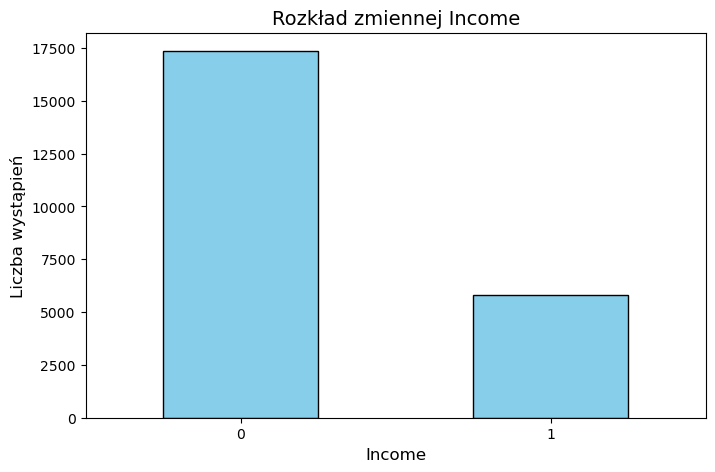

In [29]:
plt.figure(figsize=(8, 5))
df['income_>50K'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Rozkład zmiennej Income', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Liczba wystąpień', fontsize=12)
plt.xticks(rotation=0)  # Ustawienie etykiet osi X poziomo

# Wyświetlenie wykresu
plt.show()


In [30]:
print(f"Klasa pozytywna to: {df['income_>50K'].value_counts()[1] / (df['income_>50K'].value_counts()[0] + df['income_>50K'].value_counts()[1]) * 100:0.2f}% zbioru danych.")

Klasa pozytywna to: 25.01% zbioru danych.


In [31]:
# Utworzenie nowej zmiennej jako różnicy między capital.gain i capital.loss
df['net.capital'] = df['capital.gain'] - df['capital.loss']

# Sprawdzenie statystyk nowej zmiennej
print(df['net.capital'].describe())

# Podgląd wartości
print(df[['capital.gain', 'capital.loss', 'net.capital']].head())

count    23149.000000
mean      1005.553458
std       7347.306965
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: net.capital, dtype: float64
   capital.gain  capital.loss  net.capital
0         99999             0        99999
1             0             0            0
2             0             0            0
3             0             0            0
5             0             0            0


In [32]:
print((df['net.capital'] == 0).sum())

20074


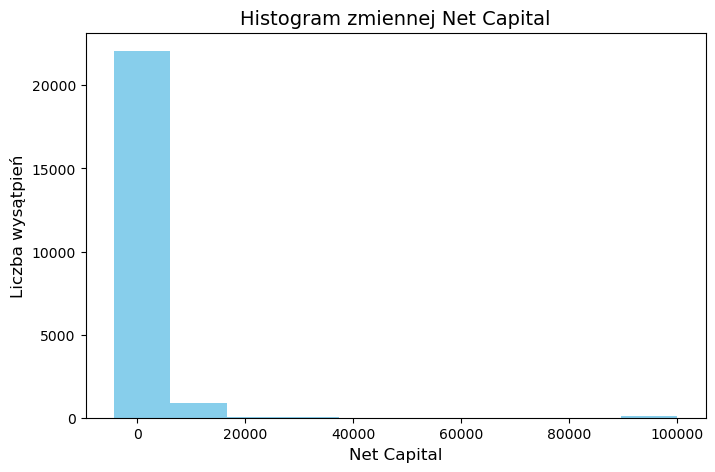

In [33]:
plt.figure(figsize=(8, 5))
plt.hist(df['net.capital'], color='skyblue')

plt.title("Histogram zmiennej Net Capital", fontsize=14)
plt.xlabel("Net Capital", fontsize=12)
plt.ylabel("Liczba wysątpień", fontsize=12)

plt.show()

In [34]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income_>50K,native.region,net.capital
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,1,North America,99999
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,0,North America,0
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,1,North America,0
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,1,North America,0
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,0,North America,0


In [35]:
df = df.drop(columns=['education', 'marital.status', 'capital.loss', 'capital.gain', 'native.region'])

In [36]:
df.shape

(23149, 11)

In [37]:
def plot_confusion_matrix(y_true, y_pred, labels, cmap, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrix_with_labels = pd.DataFrame(conf_matrix, columns=labels, index=labels)
    sns.heatmap(conf_matrix_with_labels, annot=True, fmt='d', cmap=cmap)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

In [38]:
def evaluate_model(model, X_train, y_train, X_test, y_test, labels=('neg', 'pos'), cmap='Blues'):
    """
    Funkcja do obliczania i wyświetlania metryk modelu, wizualizacji macierzy konfuzji
    oraz wyświetlania raportu klasyfikacji.

    Parametry:
    - model: sklearn-like model
        Wytrenowany model predykcyjny.
    - X_train, Y_train: array-like
        Dane treningowe i ich etykiety.
    - X_test, Y_test: array-like
        Dane testowe i ich etykiety.
    - labels: tuple, optional
        Etykiety dla osi macierzy konfuzji (domyślnie ('neg', 'pos')).
    - cmap: str, optional
        Kolorystyka mapy cieplnej (domyślnie 'Blues').

    Returns:
    - None
    """

    # Metryki dla danych treningowych
    y_pred_train = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    auc_train = roc_auc_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    print('Metryki dla danych treningowych:')
    print(f'Accuracy: {acc_train:.4f}')
    print(f'AUC: {auc_train:.4f}')
    print(f'F1: {f1_train:.4f}')
    print('\nClassification Report dla danych treningowych:')
    print(classification_report(y_train, y_pred_train))

    # Wizualizacja macierzy konfuzji dla danych treningowych
    plot_confusion_matrix(y_train, y_pred_train, labels, cmap, 'Confusion Matrix (Train)')

    # Metryki dla danych testowych
    y_pred_test = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    auc_test = roc_auc_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    print('\nMetryki dla danych testowych:')
    print(f'Accuracy: {acc_test:.4f}')
    print(f'AUC: {auc_test:.4f}')
    print(f'F1: {f1_test:.4f}')
    print('\nClassification Report dla danych testowych:')
    print(classification_report(y_test, y_pred_test))

    # Wizualizacja macierzy konfuzji dla danych testowych
    plot_confusion_matrix(y_test, y_pred_test, labels, cmap, 'Confusion Matrix (Test)')


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23149 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             23149 non-null  int64 
 1   workclass       23149 non-null  object
 2   fnlwgt          23149 non-null  int64 
 3   education.num   23149 non-null  int64 
 4   occupation      23149 non-null  object
 5   relationship    23149 non-null  object
 6   race            23149 non-null  object
 7   sex             23149 non-null  object
 8   hours.per.week  23149 non-null  int64 
 9   income_>50K     23149 non-null  int64 
 10  net.capital     23149 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [40]:
df.shape

(23149, 11)

In [41]:
columns = ['workclass', 'occupation', 'relationship', 'race', 'sex']
df = pd.get_dummies(df,columns=columns, drop_first=True, dtype=int)
df.head()

,age,fnlwgt,education.num,hours.per.week,income_>50K,net.capital,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,40,223881,15,70,1,99999,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,30,149118,9,40,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,46,109209,10,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,32,229566,11,60,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
5,63,111963,10,16,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


## Od tego momentu mamy final data

In [42]:
df.shape

(23149, 35)

In [43]:
X = df.drop(columns=['income_>50K'])
y = df['income_>50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
from sklearn.metrics import precision_score, recall_score


methods = [SMOTE(), ADASYN(), BorderlineSMOTE(), SVMSMOTE(), RandomOverSampler()]
results_oversampling = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'Recall', 'Specificity'])

for method in methods:
    X_resampled, y_resampled = method.fit_resample(X_train, y_train)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_test_pred = model.predict(X_test)
    
    # Dodanie nowego wiersza jako DataFrame
    new_row = pd.DataFrame({
        'Method': [str(method)],
        'Accuracy': [accuracy_score(y_test, y_test_pred)],
        'Precision': [precision_score(y_test, y_test_pred, zero_division=0)],
        'Recall': [recall_score(y_test, y_test_pred, zero_division=0)],
        'Specificity': [specificity_score(y_test, y_test_pred)]
    })
    
    # Połączenie wyników
    results_oversampling = pd.concat([results_oversampling, new_row], ignore_index=True)

results_oversampling


/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_68716/854401252.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_oversampling = pd.concat([results_oversampling, new_row], ignore_index=True)


,Method,Accuracy,Precision,Recall,Specificity
0,SMOTE(),0.845644,0.700621,0.656577,0.907786
1,ADASYN(),0.842765,0.691789,0.657159,0.903769
2,BorderlineSMOTE(),0.840317,0.688312,0.647846,0.903578
3,SVMSMOTE(),0.845932,0.699507,0.661234,0.906639
4,RandomOverSampler(),0.848956,0.695958,0.691502,0.900708


In [46]:
methods = [RandomUnderSampler(), NearMiss(), TomekLinks(), ClusterCentroids(), AllKNN()]
results_undersampling = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'Recall', 'Specificity'])

for method in methods:
    X_resampled, y_resampled = method.fit_resample(X_train, y_train)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_test_pred = model.predict(X_test)
    
    new_row = pd.DataFrame({
        'Method': [str(method)],
        'Accuracy': [accuracy_score(y_test, y_test_pred)],
        'Precision': [precision_score(y_test, y_test_pred, zero_division=0)],
        'Recall': [recall_score(y_test, y_test_pred, zero_division=0)],
        'Specificity': [specificity_score(y_test, y_test_pred)]
    })
    
    # Połączenie wyników
    results_undersampling = pd.concat([results_undersampling, new_row], ignore_index=True)

results_undersampling

/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_68716/3056045029.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_undersampling = pd.concat([results_undersampling, new_row], ignore_index=True)


,Method,Accuracy,Precision,Recall,Specificity
0,RandomUnderSampler(),0.819294,0.597803,0.823632,0.817869
1,NearMiss(),0.756659,0.504982,0.825960,0.733882
2,TomekLinks(),0.852844,0.724516,0.653667,0.918309
3,ClusterCentroids(),0.703384,0.451939,0.935972,0.626937
4,AllKNN(),0.818431,0.598027,0.811409,0.820738


Metryki dla danych treningowych:
Accuracy: 0.9999
AUC: 0.9999
F1: 0.9999

Classification Report dla danych treningowych:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10735
           1       1.00      1.00      1.00     10735

    accuracy                           1.00     21470
   macro avg       1.00      1.00      1.00     21470
weighted avg       1.00      1.00      1.00     21470



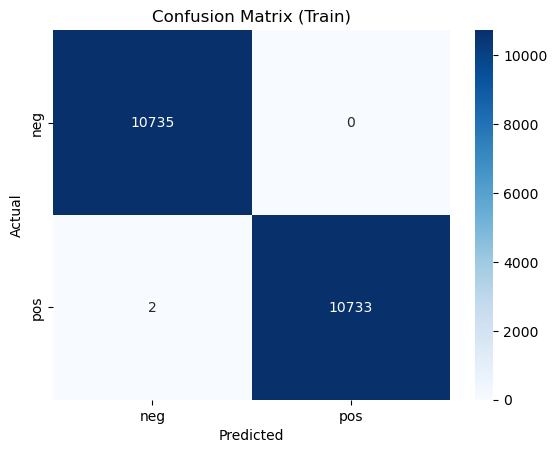


Metryki dla danych testowych:
Accuracy: 0.8407
AUC: 0.7869
F1: 0.6789

Classification Report dla danych testowych:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5227
           1       0.68      0.68      0.68      1718

    accuracy                           0.84      6945
   macro avg       0.79      0.79      0.79      6945
weighted avg       0.84      0.84      0.84      6945



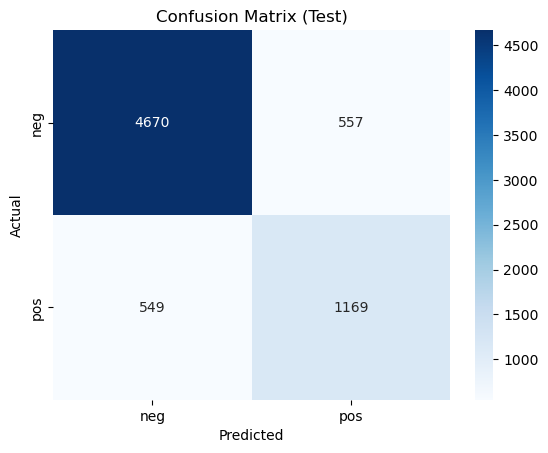

In [47]:
#use tomek links
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X_train, y_train)
#use smote on tomek links
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
#use random forest
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
evaluate_model(model, X_resampled, y_resampled, X_test, y_test)

In [48]:
df.head()

,age,fnlwgt,education.num,hours.per.week,income_>50K,net.capital,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,40,223881,15,70,1,99999,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,30,149118,9,40,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,46,109209,10,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,32,229566,11,60,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
5,63,111963,10,16,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [49]:
scaler = StandardScaler()

In [50]:
X_resampled[['fnlwgt', 'education.num','hours.per.week', 'net.capital', 'age']] = scaler.fit_transform(X_resampled[['fnlwgt', 'education.num','hours.per.week', 'net.capital', 'age']])
X_test[['fnlwgt', 'education.num','hours.per.week', 'net.capital', 'age']] = scaler.transform(X_test[['fnlwgt', 'education.num','hours.per.week', 'net.capital', 'age']])

In [61]:
y_resampled.value_counts()

income_>50K
0    10735
1    10735
Name: count, dtype: int64

In [51]:
model = RandomForestClassifier(random_state=42)

# Siatka hiperparametrów
param_grid = {
    'n_estimators': [3, 5, 10, 20, 50, 100],
    'max_depth': [None, 5, 10, 20, 30],
}


In [52]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Możesz zmienić na inne, np. 'f1', 'roc_auc', 'neg_mean_squared_error'
    cv=5,  # Liczba podziałów walidacji krzyżowej
    verbose=2,  # Wyświetlanie postępu
    n_jobs=-1  # Użycie wszystkich rdzeni procesora
)


In [53]:
grid_search.fit(X_resampled, y_resampled)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................max_depth=None, n_estimators=3; total time=   0.0s
[CV] END .....................max_depth=None, n_estimators=3; total time=   0.0s
[CV] END .....................max_depth=None, n_estimators=3; total time=   0.1s
[CV] END .....................max_depth=None, n_estimators=3; total time=   0.0s
[CV] END .....................max_depth=None, n_estimators=3; total time=   0.0s
[CV] END .....................max_depth=None, n_estimators=5; total time=   0.1s
[CV] END .....................max_depth=None, n_estimators=5; total time=   0.1s
[CV] END .....................max_depth=None, n_estimators=5; total time=   0.1s
[CV] END .....................max_depth=None, n_estimators=5; total time=   0.1s
[CV] END .....................max_depth=None, n_estimators=5; total time=   0.1s
[CV] END ....................max_depth=None, n_estimators=10; total time=   0.2s
[CV] END ....................max_depth=None, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'n_estimators': [3, 5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=2)

In [54]:
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik:", grid_search.best_score_)



Najlepsze parametry: {'max_depth': 30, 'n_estimators': 100}
Najlepszy wynik: 0.8740102468560783


In [55]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Dokładność na zbiorze testowym:", test_score)


Dokładność na zbiorze testowym: 0.8456443484521239


### SVM

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto']}
grid_svc = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, n_jobs=-1)
grid_svc.fit(X_resampled, y_resampled)
grid_svc.best_params_


TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [47]:
evaluate_model(grid_svc.best_estimator_, X_resampled, y_resampled, X_test, y_test)

NameError: name 'grid_svc' is not defined

In [ ]:
# #find best params using optuna
# import optuna
# from sklearn.model_selection import cross_val_score
# # find best params for svc model using optuna
# def objective(trial):
#     C = trial.suggest_loguniform('C', 1e-10, 1e10)
#     kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf'])
#     degree = trial.suggest_int('degree', 2, 5)
#     gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
#     model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
#     score = cross_val_score(model, X_train_scaled, y_train, n_jobs=-1, cv=5).mean()
#     return score
# # create study object
# study = optuna.create_study(direction='maximize')
# # optimize the objective function
# study.optimize(objective, n_trials=100)
# # get best params
# best_params = study.best_params

[I 2025-01-01 16:55:09,458] A new study created in memory with name: no-name-77e2a527-72b0-4c34-bf89-3f95af75f434
/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_66983/631451903.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-10, 1e10)
[W 2025-01-01 17:11:31,562] Trial 0 failed with parameters: {'C': 11648696.282830592, 'kernel': 'linear', 'degree': 5, 'gamma': 'auto'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_66983/631451903.py", line 11, in objective
    score = cross_val_score(model, X_train_sc

KeyboardInterrupt: 

KNN i KKNN

In [69]:
#grid search for knn
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_kknn = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=2, n_jobs=-1)
grid_kknn.fit(X_resampled, y_resampled)
grid_kknn.best_params_


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.3s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.3s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.3s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.3s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

Metryki dla danych treningowych:
Accuracy: 1.0000
AUC: 1.0000
F1: 1.0000

Classification Report dla danych treningowych:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10735
           1       1.00      1.00      1.00     10735

    accuracy                           1.00     21470
   macro avg       1.00      1.00      1.00     21470
weighted avg       1.00      1.00      1.00     21470



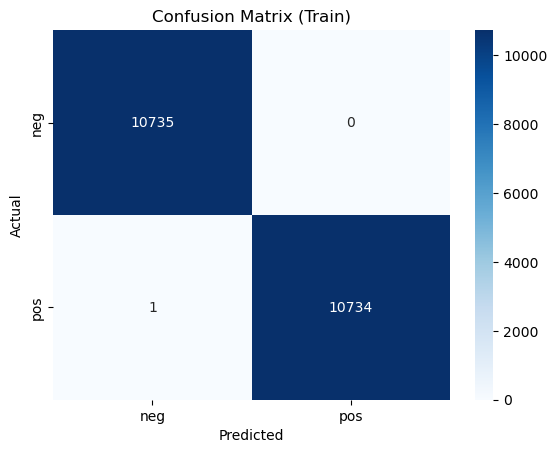


Metryki dla danych testowych:
Accuracy: 0.8132
AUC: 0.7829
F1: 0.6570

Classification Report dla danych testowych:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      5227
           1       0.60      0.72      0.66      1718

    accuracy                           0.81      6945
   macro avg       0.75      0.78      0.76      6945
weighted avg       0.83      0.81      0.82      6945



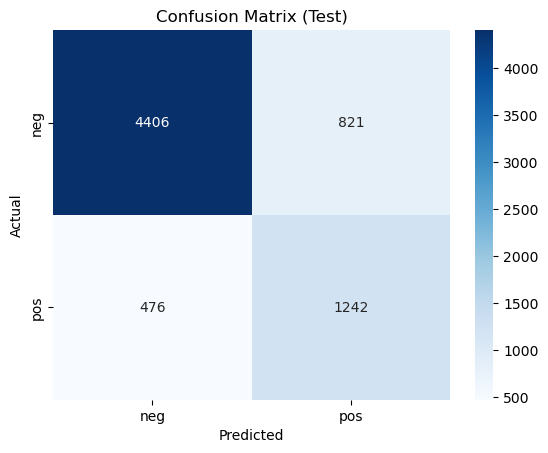

In [70]:
#evaluate model kkn with best params
evaluate_model(grid_kknn.best_estimator_, X_resampled, y_resampled, X_test, y_test)

In [48]:
# Grid Search for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definicja siatki parametrów
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularyzacja (hiperparametr C)
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Typ regularyzacji
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],  # Algorytm optymalizacji
    'max_iter': [100, 200, 500],  # Maksymalna liczba iteracji
    'fit_intercept': [True, False],  # Czy dopasować wyraz wolny (intercept)
    'tol': [1e-4, 1e-3, 1e-2],  # Tolerancja zbieżności
}

# Tworzenie obiektu GridSearchCV
grid_lr = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    refit=True,
    verbose=2,
    n_jobs=-1
)

grid_lr.fit(X_resampled, y_resampled)
grid_lr.best_params_


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_i

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, ma

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[C

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lb

[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.4s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, ma

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.

[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=saga, 

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=elastic

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fi

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.3s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.3s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line sea

[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: Th

[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.3s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.7s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penal

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, pena

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.7s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.01, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=True, max_it

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   2.9s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   2.9s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   2.8s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   2.9s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=True, max_iter=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.4s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.4s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.4s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearc

[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.7s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.8s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.9s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.7s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=elasticnet, solve

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge

[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs f

[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.8s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: Th

[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=elas

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] E

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_inte

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74:

[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs f

[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.6s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: Th

[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=0.01, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False,

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, pen

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=libline

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time= 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.2s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.1s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.1s
[CV] END C=0.01, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.1s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.1s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=liblinear, tol=0.0001; total time=   0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.4s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.5s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.6s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.6s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.7s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs f

[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data a

[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.8s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinea

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.7s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, 

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=500, penalty=elast

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter

[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=True, max_iter=100, pe

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.8s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did

[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line 

[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.9s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.2s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.9s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.8s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: Th

[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.7s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   2.1s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercep

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_inter

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.01; total time=   0.

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.5s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.7s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=0.1, fit_intercep

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.3s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.5s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.2s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.1s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.3s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=5

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.6s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.4s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.8s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.9s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.7s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.3s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.3s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.3s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.8s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_i

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did n

[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=elasticnet, solve

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/util

[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_inte

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   1.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=0.1

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.9s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   2.0s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line sea

[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs f

[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.6s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs f

[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=Fals

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   2.2s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter

[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_it

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.01; total time=

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_in

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.5s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s



/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.5s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.9s
[CV] END C=0.1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.9s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, m

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=500,

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.8s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.1s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs f

[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.1s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.1s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.01; t

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.6s
[CV] END C=1, fit_intercept=True,

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge

[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.9s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.6s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=libl

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, 

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   1.5s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   1.3s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   1.2s
[CV] END C=1, fit_intercept=True, max_iter=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.7s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.2s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/

[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.6s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, m

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line sea

[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.9s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.5s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs f

[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.1s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.9s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=saga, tol=0.000

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.5s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.8s
[CV] END C=1, fit_intercep

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.6s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.7s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.9s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.3s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.6s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.3s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.4s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   2.4s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   2.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   3.0s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   2.1s
[CV] END C=1, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   2.9s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   2.1s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   7.2s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   7.2s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   7.2s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.3s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   7.2s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solve

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.6s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.4s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.4s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.2s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.4s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.6s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.2s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.6s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solve

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=newton

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_i

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.3s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.3s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.9s
[CV] END C=1, fit_int

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=False, 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=1, fit

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.

[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning:

[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.2s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=libli

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=saga, tol=0.01; total time=   0

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear, tol=0.0

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100,

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.7s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.1s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.1s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.3s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.3s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.3s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.7s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.5s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.6s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total tim

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.1s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.4s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.3s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.5s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.8s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.8s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.7s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, to

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=elasticnet, solv

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s
[CV] END C=1, fit_intercept=False, 

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.5s
[CV] END C=1, fit_intercept=Fa

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.6s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.5s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.p

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.3s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   4.2s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.4s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.6s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.7s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=10, fit_

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=10, fit_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.7s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.4s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarni

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarni

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet,

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246

[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=elasticnet, solve

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=1, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.2s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_inter

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_inter

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.3s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs f

[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.01; 

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.4s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.4s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.7s
[CV] END C=10, fit_intercept

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.1s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.6s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.9s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.1s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.3s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=10, fit_interce

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.9s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, so

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.4s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.9s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.1s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.9s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   2.1s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.8s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.8s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.4s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.01; total time=   0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=10

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.6s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge

[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   3.4s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge

[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: Th

[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, 

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_i

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearc

[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.7s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=Fal

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fi

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.8s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=10, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.7s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The 

[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: Th

[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.9s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs f

[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: Th

[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.9s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.6s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=saga, tol=0.01; total time=  

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=elasti

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False,

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=False, 

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.3s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.6s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.8s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=10, fit_

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.4s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.3s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.4s
[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.8s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=50

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l1, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_interc

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=10, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.2s
[CV] END C=10, fit_intercept=False, max_iter=500, pen

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-lea

[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.1s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.1s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.1s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.2s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.4s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.6s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   2.3s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   2.8s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   3.1s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.2s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.7s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   3.3s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   3.4s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total t

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=10, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.4s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.9s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=500, penalty=elasticnet, solve

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_interc

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.9s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.5s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100,

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: Th

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=liblinear, 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=elasticnet, solver=lbfgs, t

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: Th

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=100, f

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.5s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.9s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.8s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.6s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.4s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.9s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   2.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.4s
[CV] END C=100, fit

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.9s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The 

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.4s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.2s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

[CV] END C=100, fit_intercept=True, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.2s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, so

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=elasticnet, solver=newton-cg, tol=0.00

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.5s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.2s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.4s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   2.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.9s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.8s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.2s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.2s
[CV] END C=100, fi

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.8s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   2.5s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.5s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.3s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   3.2s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: Convergenc

[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.8s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.8s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.3s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.8s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.8s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.3s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.5s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.5s
[CV] END C=100, fit_intercept=True, max_iter=50

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=True, max_iter=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=100, fit_intercept=True, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=500, pen

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.5s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.5s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.5s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.6s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.8s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.7s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   2.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   2.6s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   2.2s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   3.3s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   3.3s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.2s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   4.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.2s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=500, penalty=l2, solver=newton-cg

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.9s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.9s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_i

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.7s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.8s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   0.9s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=l

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=F

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=none, solver=newton-cg, tol=0.01; 

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.6s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.0001; total time=   1.0s
[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.6s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.5s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.2s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.2s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.01; total time=   0.2s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.001; total time=   0.3s
[C

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.6s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.7s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.5s
[CV] END C=100, fit_intercept=F

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.6s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=lbfgs, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.2s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.6s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.2s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.9s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=liblinear, tol=0.001; total time=   0.1s
[CV] END

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.5s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   1.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   1.8s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=100, fit_intercept=False, max_iter=20

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.2s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.001; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line sea

[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   2.5s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   2.7s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   2.8s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   3.1s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   2.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-pack

[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.8s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l2, solver=newton-cg, tol=0.0001; total time=   3.4s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=200, penalty=l1, solver=saga, tol=0.0001; total time=   3.2s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=200, pena

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.5s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   0.9s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.3s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   4.2s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.4s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.0001; total time=   0.6s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.6s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.001; total time=   1.2s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.001; total time=   1.1s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.5s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.7s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.7s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.7s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.1s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=lbfgs, tol=0.01; total time=   0.4s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penal

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalt

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line sea

[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet,

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=elasticnet, solver=newton-cg, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   2.1s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.0001; total time=   0.0s
[CV]

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   1.2s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=

/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=lbfgs, tol=0.01; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg, tol=0.0001; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=none, solver=newton-cg, tol=0.001; total time= 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   1.6s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.01; total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/optimize.py:74: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001; total time=   0.7s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   2.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l2, solver=saga, tol=0.0001; total time=   1.4s
[CV] END C=100, fit_intercept=False, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
4500 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator,

{'C': 10,
 'fit_intercept': True,
 'max_iter': 200,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001}

In [50]:
grid_lr.best_params_

{'C': 10,
 'fit_intercept': True,
 'max_iter': 200,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.001}

Metryki dla danych treningowych:
Accuracy: 0.8155
AUC: 0.8155
F1: 0.8199

Classification Report dla danych treningowych:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     10733
           1       0.80      0.84      0.82     10733

    accuracy                           0.82     21466
   macro avg       0.82      0.82      0.82     21466
weighted avg       0.82      0.82      0.82     21466



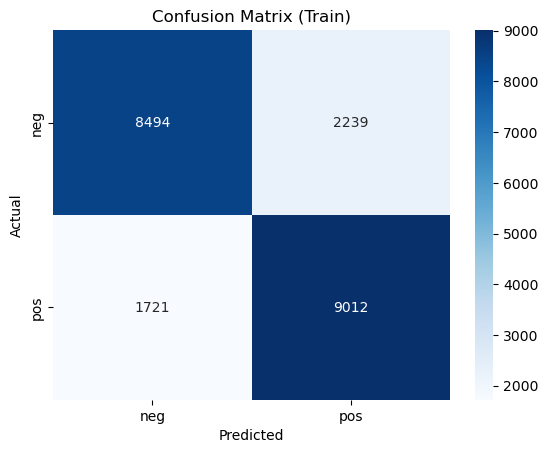


Metryki dla danych testowych:
Accuracy: 0.8066
AUC: 0.8192
F1: 0.6835

Classification Report dla danych testowych:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      5227
           1       0.57      0.84      0.68      1718

    accuracy                           0.81      6945
   macro avg       0.76      0.82      0.77      6945
weighted avg       0.85      0.81      0.82      6945



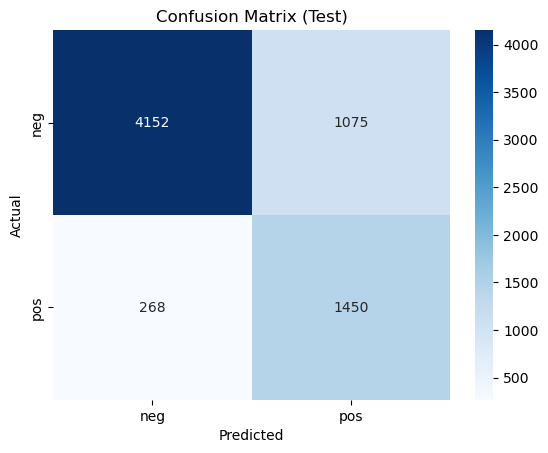

In [49]:
evaluate_model(grid_lr.best_estimator_, X_resampled, y_resampled, X_test, y_test)